# Solution 1

Fido is a unified interface for searching and fetching solar physics data irrespective of the underlying client or web service through which the data is obtained. It therefore supplies a single, easy, and consistent way to obtain most forms of solar physics data. The Fido object is in sunpy.net.
Fido supports a number of different remote data sources like
The Virtual Solar Observatory (VSO)
The Joint Science Operations Center (JSOC)
Helioviewer
Other sources for heliophysics data.
Therefore is eliminates the need to interact with individual APIs or data systems.


# Solution 2

In [4]:
from sunpy.net import Fido 
from sunpy.net import attrs as a
import pandas as pd
event_type = "FL"
tstart = "2023/05/01"
tend = "2023/05/07"
result = Fido.search(a.Time(tstart, tend),
a.hek.EventType(event_type),
a.hek.FL.GOESCls > "M1.0",
a.hek.OBS.Observatory == "GOES")
hek_results = result["hek"]

In [14]:
filtered_results =hek_results["event_starttime", "event_peaktime","event_endtime", "fl_goescls", "ar_noaanum"] # we are excludeing some values as there were some multidimentional arrrays not supported by pandas  so just including those intities done in lecture


In [24]:
flare_df = filtered_results.to_pandas()
flare_df.to_csv("flare_csv.csv", index=False)

# Solution 3

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE

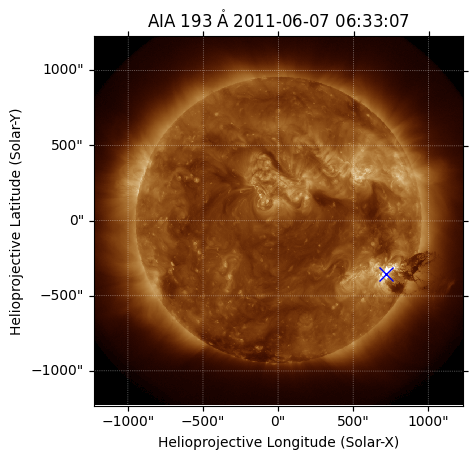

In [26]:
aia = sunpy.map.Map(AIA_193_IMAGE)
pixel_pos = np.argwhere(aia.data == aia.data.max()) * u.pixel
hpc_max = aia.wcs.pixel_to_world(pixel_pos[:, 1], pixel_pos[:, 0])
fig = plt.figure()
ax = fig.add_subplot(projection=aia)
aia.plot(axes=ax)
ax.plot_coord(hpc_max, 'bx', fillstyle='none', markersize=10)
plt.show()

# Solution 4

SunPy provides extensions to the Astropy coordinate system to represent common solar physics frames. So to use the sunpy coordinates we have to first import sunpy.coordinates which registers them with astropy.

ref :https://docs.dkist.nso.edu/projects/python-tools/en/latest/tutorial/1_astropy_and_sunpy.html

# Solution  5

The singnificance of finding brightest spot as per our task is to pinpoint the exact position of the solar flare as solar flare is sudden, intense burst of energy from the Sun, and these events usually correspond to a sharp increase in brightness in certain regions of the solar image.

# Solution 6

The occurrence of X-class solar flares is closely linked to the solar activity cycle, which spans approximately 11 years and alternates between periods of heightened activity (solar maximum) and reduced activity (solar minimum).
source : https://science.nasa.gov/science-research/heliophysics/nasa-noaa-sun-reaches-maximum-phase-in-11-year-solar-cycle

